In [2]:
## 농어의 길이를 입력해 무게를 예측하는 지도학습 회귀알고리즘 이해
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

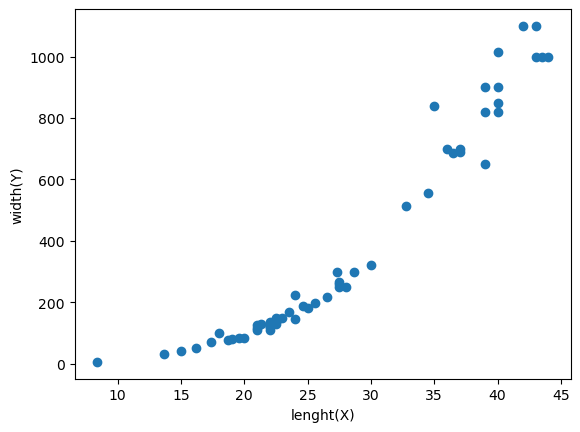

In [4]:
# 데이터 시각화
import matplotlib.pyplot as plt

plt.scatter(perch_length,perch_weight)
plt.xlabel("lenght(X)")
plt.ylabel("width(Y)")
plt.show()

In [5]:
# 테스트셋 분류를 위한 라이브러리 임포트
from sklearn.model_selection import train_test_split


In [6]:
train_input,test_input,train_target,test_target=train_test_split(
    perch_length,perch_weight,random_state=42
)

In [7]:
####### 훈련셋 형태확인
print(train_input.shape)

(42,)


In [9]:
# 독립변수가 1차원 -> 2차원 변환
# reshape 테스트
test_array=np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [11]:
# reshape 적용
test_array=test_array.reshape(4,1)
print(test_array.shape)

(4, 1)


In [12]:
# train_input에 reshape 적용  (데이터 개수 모를 때, -1 : all)
from cgi import test


train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

C:\Users\ws317\AppData\Local\Temp\ipykernel_21212\70978221.py:2: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  from cgi import test


In [13]:
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [14]:
# k-최근접 이웃 회귀 알고리즘 포인트
from sklearn.neighbors import KNeighborsClassifier


In [15]:
# 객체 생성 및 테스트
from sklearn.neighbors import KNeighborsRegressor


knr=KNeighborsRegressor()
knr.fit(train_input,train_target)
knr.score(test_input,test_target)

0.992809406101064

In [16]:
# MAE 출력
from sklearn.metrics import mean_absolute_error


In [17]:
# 테스트셋에 대한 예측 리스트 생성
test_prediction=knr.predict(test_input)

# 테스트셋의 실제정답과 비교하여 MAE 출력
MAE=mean_absolute_error(test_target,test_prediction)
print(MAE)

19.157142857142862


In [18]:
# 데이터 피팅률 확인
# 훈련셋을 테스트셋을 사용
knr.score(train_input,train_target)

0.9698823289099254

In [19]:
## train = 96.9, test = 99.9
# 언더피팅 = 모델의 복잡도를 올려야한다.
# 오버피팅 = 모델의 복잡도를 낮춰야한다.
# 이웃벡터의 수를 3으로 조정
knr.n_neighbors=3
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609
